In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [3]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2024-02-12


'2024-02-12'

In [4]:
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})

In [5]:


DCXconc = '[DCX] (nM)' 
DCX = 'DCX'
Type = 'DCX Type'

drug = '[Drug] (' r'$\mu$' 'M)'

Concentration = 'Concentration (' r'$\mu$' 'M)'


In [6]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
snsblue = '#225b91'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]


[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Import Kappa csv ##

In [275]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [276]:
drugtag = 'epod'
drugtype = 'Epothilone D'

folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if str(i.name).rfind(drugtag) != -1]
folders

[WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH1_DCX5nM_typeWT_epod10uM'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH2_DCX5nM_typeWT_epod10uM'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH3_DCX5nM_typeWT_epod10uM')]

In [277]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('final') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH1_DCX5nM_typeWT_epod10uM/1-Stack_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH1_DCX5nM_typeWT_epod10uM/3-Stack_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH1_DCX5nM_typeWT_epod10uM/4-Stack_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH1_DCX5nM_typeWT_epod10uM/5-Stack_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH1_DCX5nM_typeWT_epod10uM/6-Stack_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH2_DCX5nM_typeWT_epod10uM/1-Stack_Composite-amplified-final.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/2023-05-12_sec-dcx_WT-EpoD/CH2_

In [278]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).rfind(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [279]:
dates= []
CH= []
tax= []
dcx = []
dcxtype= []
for i in files:
    dateloc = str(i).rfind("202")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    dcx0 = findmetadata("DCX",'nM',i)
    dcx = dcx + [dcx0] 
    
    type0 = findmetadata("type",'_',i)
    dcxtype = dcxtype + [type0] 
    
    tax0 = findmetadata(drugtag,'uM',i)
    tax = tax + [tax0] 
    

print(dates,CH,dcx, dcxtype,tax,len(dates))

['2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12', '2023-05-12'] ['1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3'] ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5'] ['WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT', 'WT'] ['10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10'] 17


In [280]:
roll = 5
c = 0 
joindata = pd.DataFrame(columns=[] , index=[])
for i in files:
    data0 = pd.read_csv(i, encoding='utf-8')
    
    for j in data0['Curve Name'].unique():
        curvedata = data0[data0['Curve Name'] == j]
        array = curvedata['Green Intensity'].values
        
        curvedata['Date'] = dates[c]
        curvedata['CH'] = CH[c]
        curvedata[DCXconc] = dcx[c]
        curvedata[Type] = dcxtype[c]
        curvedata['Drug Type'] = drugtype
        curvedata[drug] = tax[c]
        curvedata['Filename'] = i.stem
        
        joindata = joindata.append(curvedata, ignore_index=True)
    c += 1
joindata


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity,Date,CH,[DCX] $(n M)$,DCX Type,Drug Type,[Drug] $(\mu M)$,Filename
0,CURVE 1,13.960357,0.351648,0.332879,3.671400,31.966500,0.012601,-1,85.0,34.0,34.0,2023-05-12,1,5,WT,Epothilone D,10,1-Stack_Composite-amplified-final
1,CURVE 1,13.960357,0.351648,0.332879,3.736331,31.965051,0.012907,-1,85.0,68.0,68.0,2023-05-12,1,5,WT,Epothilone D,10,1-Stack_Composite-amplified-final
2,CURVE 1,13.960357,0.351648,0.332879,3.800572,31.963671,0.013221,-1,51.0,85.0,85.0,2023-05-12,1,5,WT,Epothilone D,10,1-Stack_Composite-amplified-final
3,CURVE 1,13.960357,0.351648,0.332879,3.864127,31.962360,0.013544,-1,51.0,85.0,85.0,2023-05-12,1,5,WT,Epothilone D,10,1-Stack_Composite-amplified-final
4,CURVE 1,13.960357,0.351648,0.332879,3.927001,31.961116,0.013875,-1,51.0,17.0,17.0,2023-05-12,1,5,WT,Epothilone D,10,1-Stack_Composite-amplified-final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106235,CURVE 10,15.306086,0.010468,0.007231,60.897370,13.372175,0.001626,1,306.0,17.0,17.0,2023-05-12,3,5,WT,Epothilone D,10,6-Stack_Composite-amplified-final
106236,CURVE 10,15.306086,0.010468,0.007231,60.951499,13.370644,0.001657,1,306.0,17.0,17.0,2023-05-12,3,5,WT,Epothilone D,10,6-Stack_Composite-amplified-final
106237,CURVE 10,15.306086,0.010468,0.007231,61.005992,13.369097,0.001687,1,323.0,34.0,34.0,2023-05-12,3,5,WT,Epothilone D,10,6-Stack_Composite-amplified-final
106238,CURVE 10,15.306086,0.010468,0.007231,61.060853,13.367534,0.001716,1,323.0,34.0,34.0,2023-05-12,3,5,WT,Epothilone D,10,6-Stack_Composite-amplified-final


In [281]:
path.parents[0]

WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves')

In [282]:
newdirectory = str(path.parents[0])+'//Curvature_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)

In [283]:
name = dates[0]+ '_'+drugtag+'_jointdata-on_'+date_today +'.csv'
name

'2023-05-12_epod_jointdata-on_2023-06-13.csv'

In [284]:
joindata.to_csv(path/(name), encoding='utf-8', index=False)
joindata.to_csv(newmydir/(name), encoding='utf-8', index=False)

## Join various data sheets ##

In [285]:
#askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = newmydir

In [286]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if str(i).rfind('csv') != -1 if str(i).rfind('jointdata') != -1]

files

[WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-04-05_tax_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-04-11_tax_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-04-25_tax_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-05-08_tax_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-05-10_sirtub_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-05-11_doce_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-05-12_epod_jointdata-on_2023-06-13.csv'),
 WindowsPath('D:/Sofia/2023_1winter-SEC-expansion-curves/Curvature_Data_Sheets/2023-05-16_sirtub_jointdata-on_2023-06-13

In [287]:
joindata = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    joindata = joindata.append(d, ignore_index=True)

mastersheetname = 'jointdata-on_'+date_today+'_MasterSheet.csv'
mastersheetname

'jointdata-on_2023-06-13_MasterSheet.csv'

In [288]:
joindata.to_csv(path/(mastersheetname), encoding='utf-8', index=False)
joindata

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity,Date,CH,[DCX] $(n M)$,DCX Type,Drug Type,[Drug] $(\mu M)$,Filename
0,CURVE 1,27.108929,0.333002,0.569584,35.004900,36.460800,0.018782,-1,153.0,68.0,68.0,2023-04-05,5,5,WT,Paclitaxel,10,2-Stack_final_amplified
1,CURVE 1,27.108929,0.333002,0.569584,34.981278,36.466700,0.018370,-1,170.0,17.0,17.0,2023-04-05,5,5,WT,Paclitaxel,10,2-Stack_final_amplified
2,CURVE 1,27.108929,0.333002,0.569584,34.957887,36.472531,0.017925,-1,170.0,17.0,17.0,2023-04-05,5,5,WT,Paclitaxel,10,2-Stack_final_amplified
3,CURVE 1,27.108929,0.333002,0.569584,34.934724,36.478295,0.017448,-1,204.0,0.0,0.0,2023-04-05,5,5,WT,Paclitaxel,10,2-Stack_final_amplified
4,CURVE 1,27.108929,0.333002,0.569584,34.911788,36.483991,0.016935,-1,204.0,0.0,0.0,2023-04-05,5,5,WT,Paclitaxel,10,2-Stack_final_amplified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537467,CURVE 8,11.242575,0.664717,0.776231,53.554690,14.204073,0.004750,-1,1632.0,170.0,459.0,2023-05-16,1,5,WT,Sir-Tubulin,10,6-Stack_Composite-amplified-final
537468,CURVE 8,11.242575,0.664717,0.776231,53.485662,14.237860,0.004480,-1,4369.0,0.0,357.0,2023-05-16,1,5,WT,Sir-Tubulin,10,6-Stack_Composite-amplified-final
537469,CURVE 8,11.242575,0.664717,0.776231,53.415586,14.272129,0.004224,-1,5389.0,0.0,425.0,2023-05-16,1,5,WT,Sir-Tubulin,10,6-Stack_Composite-amplified-final
537470,CURVE 8,11.242575,0.664717,0.776231,53.344454,14.306886,0.003983,-1,4845.0,0.0,476.0,2023-05-16,1,5,WT,Sir-Tubulin,10,6-Stack_Composite-amplified-final


### If data already joint ###

In [49]:
askfile = filedialog.askopenfilename()
joindata = pd.read_csv(askfile, encoding='utf-8')

In [50]:
path = Path(askfile).parents[0]
path

WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Fig_mutants_supp/r178l2nM')

In [51]:
joindata

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity
0,CURVE 1,15.110515,0.342847,0.366958,16.643478,2.064232,0.005303,1,0.0,11.0,11.0
1,CURVE 1,15.110515,0.342847,0.366958,16.559523,2.074531,0.005457,1,1.0,11.0,11.0
2,CURVE 1,15.110515,0.342847,0.366958,16.476564,2.084747,0.005615,1,0.0,11.0,11.0
3,CURVE 1,15.110515,0.342847,0.366958,16.394594,2.094880,0.005779,1,1.0,11.0,11.0
4,CURVE 1,15.110515,0.342847,0.366958,16.313606,2.104931,0.005949,1,0.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
891,CURVE 1,15.110515,0.342847,0.366958,16.421055,9.075325,0.008337,1,0.0,10.0,10.0
892,CURVE 1,15.110515,0.342847,0.366958,16.461079,9.099348,0.008162,1,0.0,8.0,8.0
893,CURVE 1,15.110515,0.342847,0.366958,16.501492,9.123584,0.007991,1,0.0,8.0,8.0
894,CURVE 1,15.110515,0.342847,0.366958,16.542297,9.148034,0.007823,1,0.0,10.0,10.0


In [52]:
singlecurve = joindata

In [53]:
greenint = singlecurve['Red Intensity'].values
np.min(greenint)

0.0

In [54]:
singlecurve['Green Intensity Normalized'] = (singlecurve['Red Intensity'] -  np.min(greenint))/(np.max(greenint)-np.min(greenint))

## One Curve ##

In [9]:
def single_curve(data,date,ch,filename,curvename):
    singlecurve = data.loc[(data['Date'] == date) & 
                 (data['CH'] == ch) &
                 (data['Filename'] == filename) &
                 (data['Curve Name'] == curvename)
                ] 
    return singlecurve

In [55]:
#(joindata,'2023-04-05',5,'7-Stack_final_amplified','CURVE 1') ----- tax WT

##OLD

#(joindata,'2023-05-10',1,'5-Stack_Composite-amplified-final','CURVE 1') ----- Sir
#(joindata,'2023-05-12',2,'6-Stack_Composite-amplified-final','CURVE 1') ---- EpoD
#(joindata,'2023-05-11',3,'1-Stack_Composite-amplified-final','CURVE 1') --- Doce


##NEW
#(joindata,'2023-05-11',1,'4-Stack_Composite-amplified-final','CURVE 3') --- Doce
#(joindata,'2023-05-12',3,'5-Stack_Composite-amplified-final','CURVE 2') --Epod
#(joindata,'2023-05-16',1,'3-Stack_Composite-amplified-final','CURVE 3') ---Sir

#(joindata,'2023-04-25',2,'6-Stack_Composite-amplified-final','CURVE 2') --- R178L

In [56]:
singlecurve = single_curve(joindata,'2023-05-08',1,'2-Stack_Composite-amplified-final','CURVE 1') #(joindata,'2023-05-10',1,'5-Stack_Composite-amplified-final','CURVE 1')
singlecurve

,Date,CH,Filename,Curve Name,Point Curvature (um-1),Red Intensity,Green Intensity,Blue Intensity,[DCX] (nM),DCX Type,[Drug] ($\mu$M),Drug Type,Red Intensity Normalized,Green Intensity Normalized,Blue Intensity Normalized,Curve Length (um)
161664,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.002526,1207,0,0,15,R89G,10,Paclitaxel,0.105185,0.000000,0.000000,21.922952
161665,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.002587,1309,0,0,15,R89G,10,Paclitaxel,0.114074,0.000000,0.000000,21.922952
161666,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.002650,1462,0,0,15,R89G,10,Paclitaxel,0.127407,0.000000,0.000000,21.922952
161667,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.002714,1700,0,0,15,R89G,10,Paclitaxel,0.148148,0.000000,0.000000,21.922952
161668,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.002780,2159,0,0,15,R89G,10,Paclitaxel,0.188148,0.000000,0.000000,21.922952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162555,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.046942,4318,153,153,15,R89G,10,Paclitaxel,0.376296,0.037190,0.037190,21.922952
162556,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.045519,4522,323,323,15,R89G,10,Paclitaxel,0.394074,0.078512,0.078512,21.922952
162557,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.044148,5134,527,527,15,R89G,10,Paclitaxel,0.447407,0.128099,0.128099,21.922952
162558,2023-05-08,1,2-Stack_Composite-amplified-final,CURVE 1,0.042826,5202,1156,1156,15,R89G,10,Paclitaxel,0.453333,0.280992,0.280992,21.922952


In [55]:

curve_len = pd.unique(singlecurve['Curve Length (um)'].values) #[singlecurve['Curve Name'] == 'CURVE 2']
kappa_len = len(singlecurve['Green Intensity'].values)
point_len = curve_len / kappa_len
point_len

array([0.01686441])

In [56]:
2*2.02/curve_len

array([0.26736349])

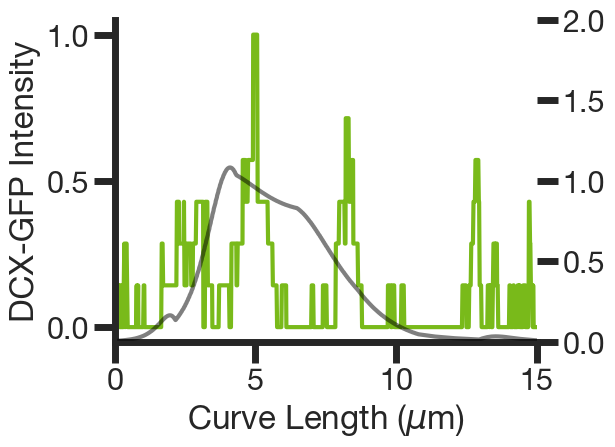

In [57]:
#data = data.sort_values(by=['Point Curvature (um-1)'])

fig, ax = plt.subplots(1,1,figsize=(6.67,5))
ax2 = ax.twinx()

#x = data['Point Curvature (um-1)'].values
x = np.round(range(0,kappa_len) * point_len, 2)
y = singlecurve['Point Curvature (um-1)'].values 
mean = singlecurve['Green Intensity Normalized'].values
# std = singlecurve['Green Intensity Rolling std'].values

ax2.plot(x, y, color=black, alpha=0.5)
ax.plot(x, mean, color=green)



ax.set_ylabel('DCX-GFP Intensity')
ax.set_xlabel('Curve Length (' r'$\mu$' 'm)'  )
ax.set_xlim(0,15)
# ax.set_ylim(0,2000)
ax.set_yticks(np.arange(0, 1.1, 0.5))
ax2.set_ylim(0,2)
ax.set_xticks(np.arange(0, 15.1, 5))

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)

ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
ax2.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
# plt.savefig(path/('curvature_dcx_'+date_today+'.pdf'))

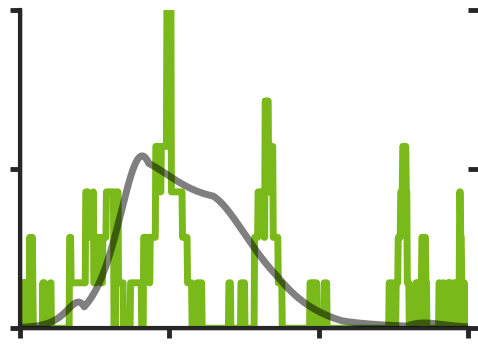

In [58]:
#data = data.sort_values(by=['Point Curvature (um-1)'])

fig, ax = plt.subplots(1,1,figsize=(5.3,4))
ax2 = ax.twinx()

#x = data['Point Curvature (um-1)'].values
x = range(0,len(singlecurve['Green Intensity Normalized'].values)) * point_len
y = singlecurve['Point Curvature (um-1)'].values 
mean = singlecurve['Green Intensity Normalized'].values
# std = singlecurve['Green Intensity Rolling std'].values

ax2.plot(x, y, color=black, alpha=0.5,linewidth=5)
ax.plot(x, mean, color=green,linewidth=5)

# plt.fill_between(x, mean - std, mean + std, color=snsblue, alpha=0.2)

#ax.set_ylabel('DCX-GFP Intensity')
#ax.set_xlabel('Curve Length (' r'$\mu$' 'm)'  )
ax.set_yticklabels([])
ax2.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlim(0,15)
ax.set_ylim(0,1)
ax2.set_ylim(0,2)
ax.set_xticks(np.arange(0, 15.1, 5))
ax.set_yticks(np.arange(0, 1.1, 0.5))
ax2.set_yticks(np.arange(0, 2.1, 1))


sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(3)

ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax2.tick_params(axis='both', width = 3.5, length = 7)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.tight_layout()
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
plt.savefig(path/('curvature_dcx_r178l2nM_'+date_today+'.svg'))

## Normalize by FOV ##

In [289]:
keep_columns = ['Date','CH', 'Filename','Curve Name','Point Curvature (um-1)','Red Intensity','Green Intensity','Blue Intensity',DCXconc,Type,drug,'Drug Type']
unique_curve_columns = ['Date','CH', 'Filename']

analze_data = joindata[keep_columns]
data_unique = analze_data[unique_curve_columns].drop_duplicates(subset =unique_curve_columns, keep = 'first')
data_unique

,Date,CH,Filename
0,2023-04-05,5,2-Stack_final_amplified
4736,2023-04-05,5,3-Stack_final_amplified
9344,2023-04-05,5,4-Stack_final_amplified
12672,2023-04-05,5,6-Stack_final_amplified
17280,2023-04-05,5,7-Stack_final_amplified
...,...,...,...
514944,2023-05-16,1,2-Stack_Composite-amplified-final
517888,2023-05-16,1,3-Stack_Composite-amplified-final
522880,2023-05-16,1,4-Stack_Composite-amplified-final
525440,2023-05-16,1,5-Stack_Composite-amplified-final


In [290]:
def single_FOV(data,i):
    singleFOV = data.loc[(data['Date'] == data_unique['Date'].values[i]) & 
                 (data['CH'] == data_unique['CH'].values[i]) &
                 (data['Filename'] == data_unique['Filename'].values[i]) 
                        ] 
    return singleFOV

In [291]:
def normalizeFOV(singleFOV,channels):
    for channel in channels:
            max_channel = singleFOV[channel].max()
            min_channel = singleFOV[channel].min()

            singleFOV[channel+' Normalized'] =  (singleFOV[channel] - min_channel) / (max_channel -  min_channel)

    return singleFOV


In [292]:
channels = ['Red Intensity','Green Intensity','Blue Intensity']

results = pd.DataFrame(columns=[] , index=[])
for i in range(0,len(data_unique)):
    
    singleFOV = single_FOV(analze_data,i)
    results0 = normalizeFOV(singleFOV,channels)
    results = pd.concat([results, results0], sort=False)
    
results

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,CH,Filename,Curve Name,Point Curvature (um-1),Red Intensity,Green Intensity,Blue Intensity,[DCX] $(n M)$,DCX Type,[Drug] $(\mu M)$,Drug Type,Red Intensity Normalized,Green Intensity Normalized,Blue Intensity Normalized
0,2023-04-05,5,2-Stack_final_amplified,CURVE 1,0.018782,153.0,68.0,68.0,5,WT,10,Paclitaxel,0.290323,0.045977,0.045977
1,2023-04-05,5,2-Stack_final_amplified,CURVE 1,0.018370,170.0,17.0,17.0,5,WT,10,Paclitaxel,0.322581,0.011494,0.011494
2,2023-04-05,5,2-Stack_final_amplified,CURVE 1,0.017925,170.0,17.0,17.0,5,WT,10,Paclitaxel,0.322581,0.011494,0.011494
3,2023-04-05,5,2-Stack_final_amplified,CURVE 1,0.017448,204.0,0.0,0.0,5,WT,10,Paclitaxel,0.387097,0.000000,0.000000
4,2023-04-05,5,2-Stack_final_amplified,CURVE 1,0.016935,204.0,0.0,0.0,5,WT,10,Paclitaxel,0.387097,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537467,2023-05-16,1,6-Stack_Composite-amplified-final,CURVE 8,0.004750,1632.0,170.0,459.0,5,WT,10,Sir-Tubulin,0.248062,0.043860,0.341772
537468,2023-05-16,1,6-Stack_Composite-amplified-final,CURVE 8,0.004480,4369.0,0.0,357.0,5,WT,10,Sir-Tubulin,0.664083,0.000000,0.265823
537469,2023-05-16,1,6-Stack_Composite-amplified-final,CURVE 8,0.004224,5389.0,0.0,425.0,5,WT,10,Sir-Tubulin,0.819121,0.000000,0.316456
537470,2023-05-16,1,6-Stack_Composite-amplified-final,CURVE 8,0.003983,4845.0,0.0,476.0,5,WT,10,Sir-Tubulin,0.736434,0.000000,0.354430


In [293]:
mastersheetname = 'jointdata-on_'+date_today+'_NormalizedMasterSheet.csv'
mastersheetname

'jointdata-on_2023-06-13_NormalizedMasterSheet.csv'

In [294]:
results.to_csv(path/(mastersheetname), encoding='utf-8', index=False)


# From NORMALIZED Mastersheet  #

In [6]:
askfile = filedialog.askopenfilename()


In [36]:
data = pd.read_csv(askfile, encoding='utf-8')

In [37]:
results = data

In [9]:
path = Path(askfile).parents[0]
path

WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Data/curvature-intensity')

In [31]:
dcxT = 'WT'
drugT = 'Sir-Tubulin'

resultsN = results[(results['Drug Type'] == drugT) & (results['DCX Type'] == dcxT)]
countingn = results.groupby(['DCX Type','Drug Type','Date','CH']).size()
datanumber = results.groupby(['DCX Type','Drug Type']).size()

In [32]:
datanumber

DCX Type  Drug Type   
R178L     Paclitaxel       69888
R89G      Paclitaxel       98048
WT        Docetaxel       121088
          Epothilone D    106240
          Paclitaxel       87296
          Sir-Tubulin      54912
dtype: int64

In [33]:
countingn

DCX Type  Drug Type     Date        CH
R178L     Paclitaxel    2023-04-11  4     25472
                        2023-04-25  1     21248
                                    2     23168
R89G      Paclitaxel    2023-05-08  1     33280
                                    2     33152
                                    3     31616
WT        Docetaxel     2023-05-11  1     36224
                                    2     43648
                                    3     41216
          Epothilone D  2023-05-12  1     28800
                                    2     37888
                                    3     39552
          Paclitaxel    2023-04-05  5     21248
                        2023-04-11  1     34176
                                    2     31872
          Sir-Tubulin   2023-05-10  1      6144
                                    2     18688
                        2023-05-16  1     30080
dtype: int64

## Bin data and Plot ##

In [13]:
greenyellow_fill = '#ADBA1A'
greenyellow_marker = '#96BA1A'
blueyellow_fill = '#00FF6E'
blueyellow_marker = '#06AC2C'

In [14]:
DataLabel = [['Tubulin'],['DCX-GFP'],['SiR-Tubulin']]
channels=['Red','Green','Blue']
colors_fill=[magenta,blueyellow_fill,blue]
colors_marker=[magenta,blueyellow_marker,blue]

In [55]:
def michaelis_menten(x, kd):
    return   np.power(x, 1)/(kd + np.power(x, 1)) 

In [51]:
dcxtype  = data['DCX Type'].unique()
drugtype =  data['Drug Type'].unique()

bin_results = pd.DataFrame(columns=[] , index=[])
bin_std = pd.DataFrame(columns=[] , index=[])

for i in dcxtype:
    for j in drugtype:
    
        datadcxtype = data[(data['DCX Type']== i) & (data['Drug Type']== j)]

        if np.sum(datadcxtype['Point Curvature (um-1)']) == 0:
                        continue
        else:
            datadcxtype = datadcxtype[['Point Curvature (um-1)','Red Intensity Normalized','Green Intensity Normalized','Blue Intensity Normalized']]
            
            binsize = 0.05
            limX= 2
            cut_interval = pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))
            data_interval_mean = datadcxtype.groupby(cut_interval,observed=False).mean()
            data_interval_std = datadcxtype.groupby(cut_interval,observed=False).std()
                
            data_interval_mean['Bin Center'] =np.arange(binsize, limX+binsize, binsize)-binsize/2
            data_interval_std['Bin Center'] =np.arange(binsize, limX+binsize, binsize)-binsize/2

            bins = data_interval_mean['Bin Center'].values()
            coeff, var_matrix = sp.optimize.curve_fit(michaelis_menten,data_interval_mean['Bin Center'].values(),n,[2,1])
            
    
            data_interval_mean['DCX Type'] =i
            data_interval_std['DCX Type'] =i
            data_interval_mean['Drug Type'] =j
            data_interval_std['Drug Type'] =j

            bin_results = pd.concat([bin_results, data_interval_mean], sort=False)
            bin_std = pd.concat([bin_results, data_interval_std], sort=False)

            

    



In [54]:
bin_results.reset_index(drop=True)

,Point Curvature (um-1),Red Intensity Normalized,Green Intensity Normalized,Blue Intensity Normalized,Bin Center,DCX Type,Drug Type
0,0.016660,0.372514,0.067640,0.067640,0.025,WT,Paclitaxel
1,0.070004,0.357162,0.070811,0.070811,0.075,WT,Paclitaxel
2,0.122607,0.369851,0.080485,0.080485,0.125,WT,Paclitaxel
3,0.175028,0.377632,0.079090,0.079090,0.175,WT,Paclitaxel
4,0.224382,0.362891,0.089002,0.089002,0.225,WT,Paclitaxel
...,...,...,...,...,...,...,...
235,1.773481,0.136148,0.391873,0.391873,1.775,R89G,Paclitaxel
236,1.826534,0.138642,0.342515,0.342515,1.825,R89G,Paclitaxel
237,1.871914,0.132946,0.342580,0.342580,1.875,R89G,Paclitaxel
238,1.924462,0.160626,0.298254,0.298254,1.925,R89G,Paclitaxel


In [25]:
data = results.sort_values(by=['Point Curvature (um-1)'])
data = data[data['Drug Type'] == 'Paclitaxel']

C:\Users\sofia\AppData\Local\Temp\ipykernel_13728\2043085144.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_interval_mean = datadcxtype.groupby(pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))).mean()
C:\Users\sofia\AppData\Local\Temp\ipykernel_13728\2043085144.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_interval_std = datadcxtype.groupby(pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))).std()
C:\Users\sofia\AppData\Local\Temp\ipykernel_13728\2043085144.py:16: FutureWarning: The default of observed=False is deprecated

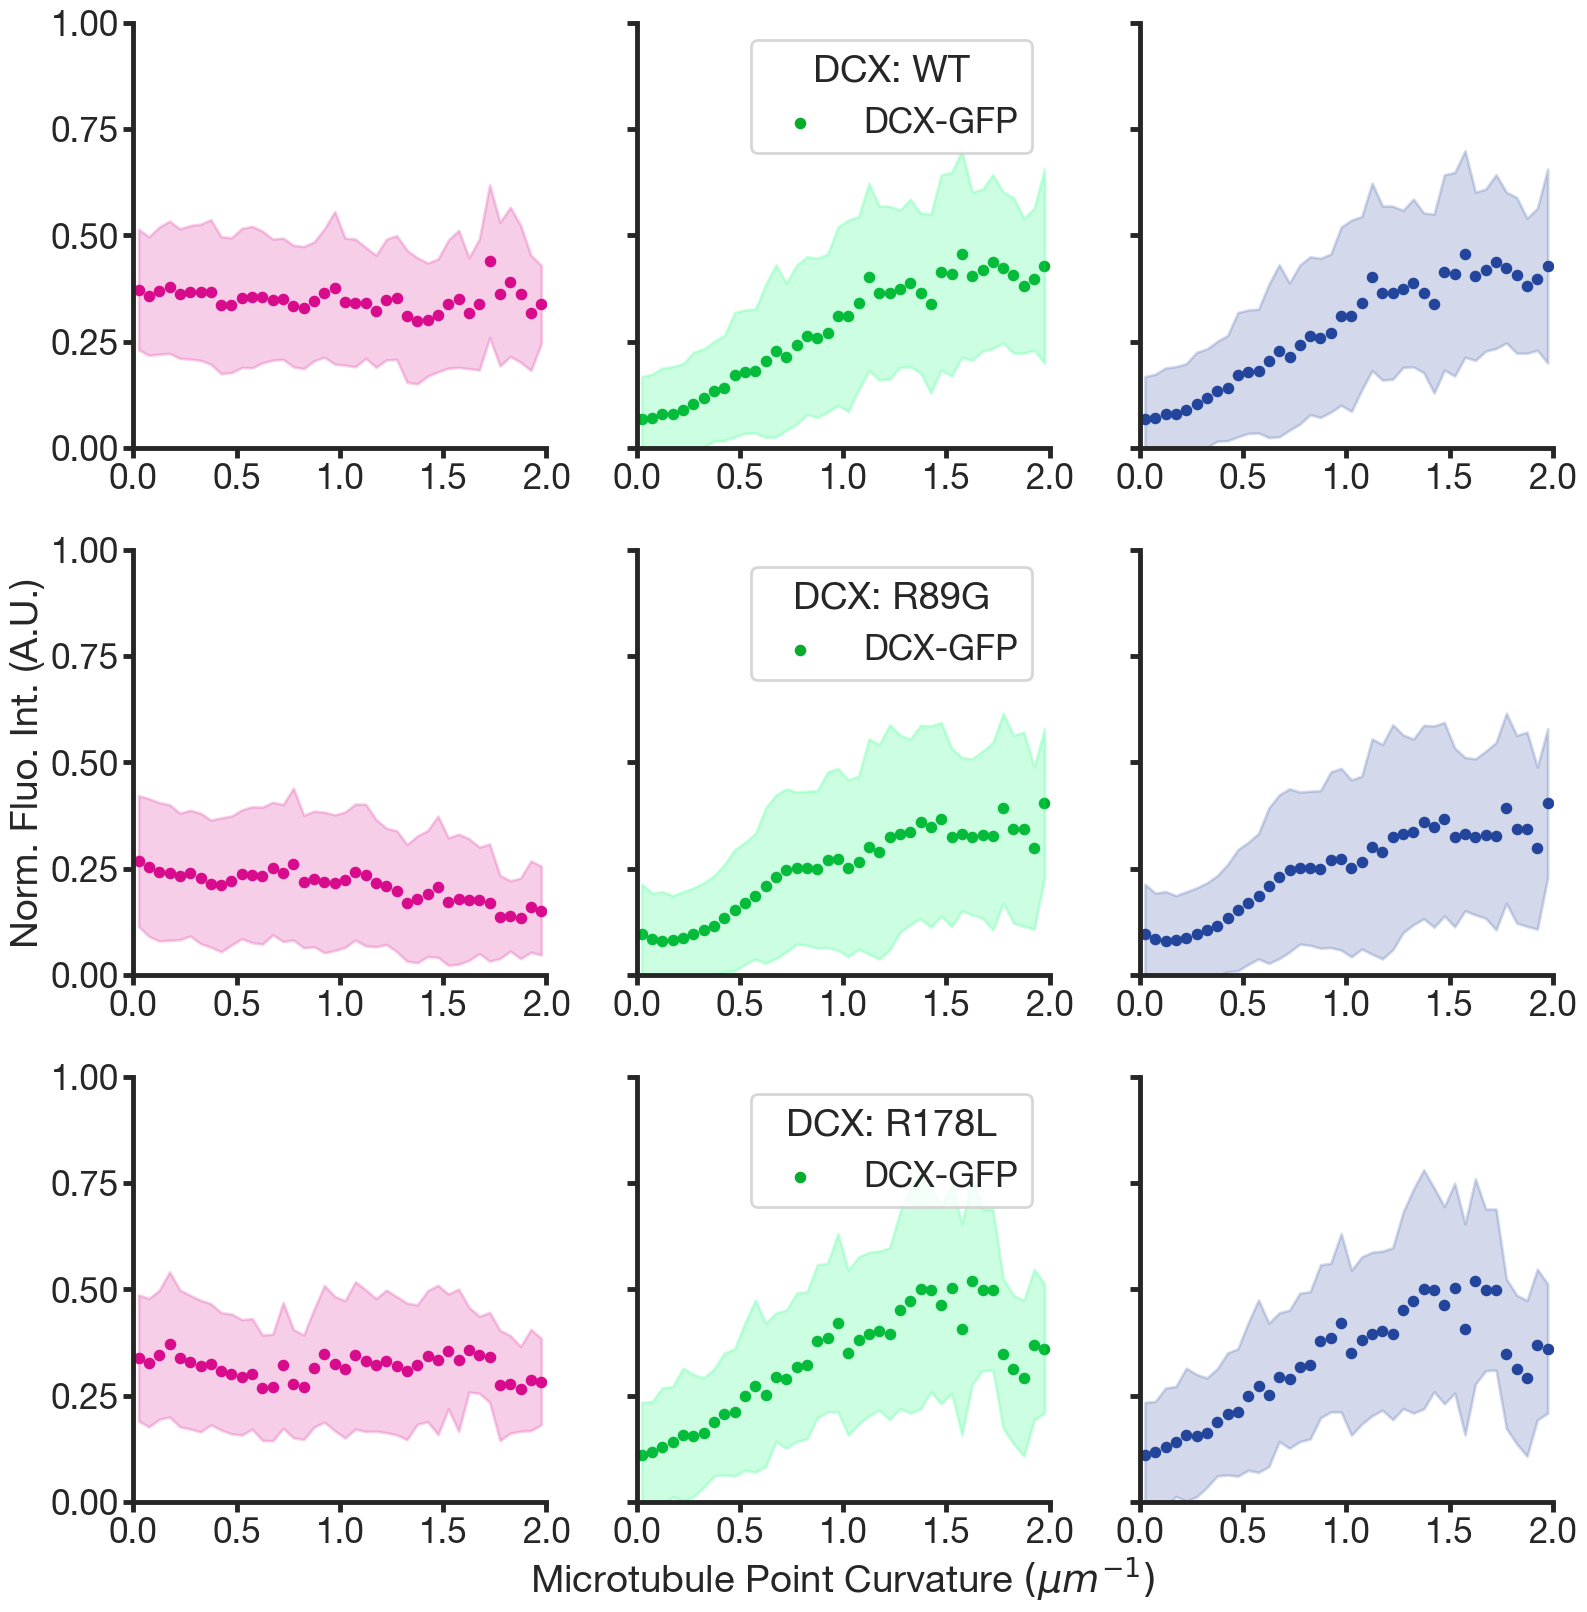

In [26]:
scattersize = 40

fig, ax = plt.subplots(3,3,figsize=(16.5,16.75), sharey=True)
#gs = fig.add_gridspec(1, 3, hspace=0, wspace=0)
count = 0
#fig.subplots_adjust(hspace=0)
for i in np.arange(len(ax)):
    
    dcxtype  = data['DCX Type'].unique()
    
    datadcxtype = data[data['DCX Type']== dcxtype[i]]
    datadcxtype = datadcxtype[['Point Curvature (um-1)','Red Intensity Normalized','Green Intensity Normalized','Blue Intensity Normalized']]
    
    binsize = 0.05
    limX= 2
    data_interval_mean = datadcxtype.groupby(pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))).mean()
    data_interval_std = datadcxtype.groupby(pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))).std()
    data_interval_mean['Bin Center'] =np.arange(binsize, limX+binsize, binsize)-binsize/2
    data_interval_std['Bin Center'] =np.arange(binsize, limX+binsize, binsize)-binsize/2
    
    
    
    for j in np.arange(len(ax)):
    
            
        x = data_interval_mean['Bin Center'].values
        channel = channels[j]
        mean = data_interval_mean[channel+' Intensity Normalized'].values
        std = data_interval_std[channel+' Intensity Normalized'].values
        colorF = colors_fill[j]
        colorM = colors_marker[j]
        ax[i][j].scatter(x, mean, color=colorM,s=scattersize)
        ax[i][j].fill_between(x, mean - std, mean + std, color=colorF, alpha=0.2)
        ax[i][j].set_ylim(0,1)
        ax[i][j].set_xticks(np.arange(0, 2.1, 0.5))
        ax[i][j].set_yticks(np.arange(0, 1.1, 0.25))
        ax[i][j].set_xlim(0,2)
        
        ax[i][j].spines['left'].set_lw(3.5)
        ax[i][j].spines['bottom'].set_lw(3.5)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)

        #ax[i][j].legend(DataLabel[j],loc='upper right')
        ax[i][1].legend(DataLabel[j-1],loc='upper right',title='DCX: '+dcxtype[i])

        


ax[1][0].set_ylabel('Norm. Fluo. Int. (A.U.)')
ax[2][1].set_xlabel('Microtubule Point Curvature '  r'$(\mu m ^{-1})$')

#fig.supxlabel('Microtubule Point Curvature ' r'$(\mu m ^{-1})$')

sns.set_style("ticks")
sns.despine()

sns.set_context("poster", font_scale=1.15, rc={"lines.linewidth":3.0})

plt.tight_layout()
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
plt.savefig(path/('curvature_dcx_tax'+date_today+'.pdf'))

In [96]:
data = results.sort_values(by=['Point Curvature (um-1)'])
data = data[data['Drug Type'] != 'Paclitaxel']

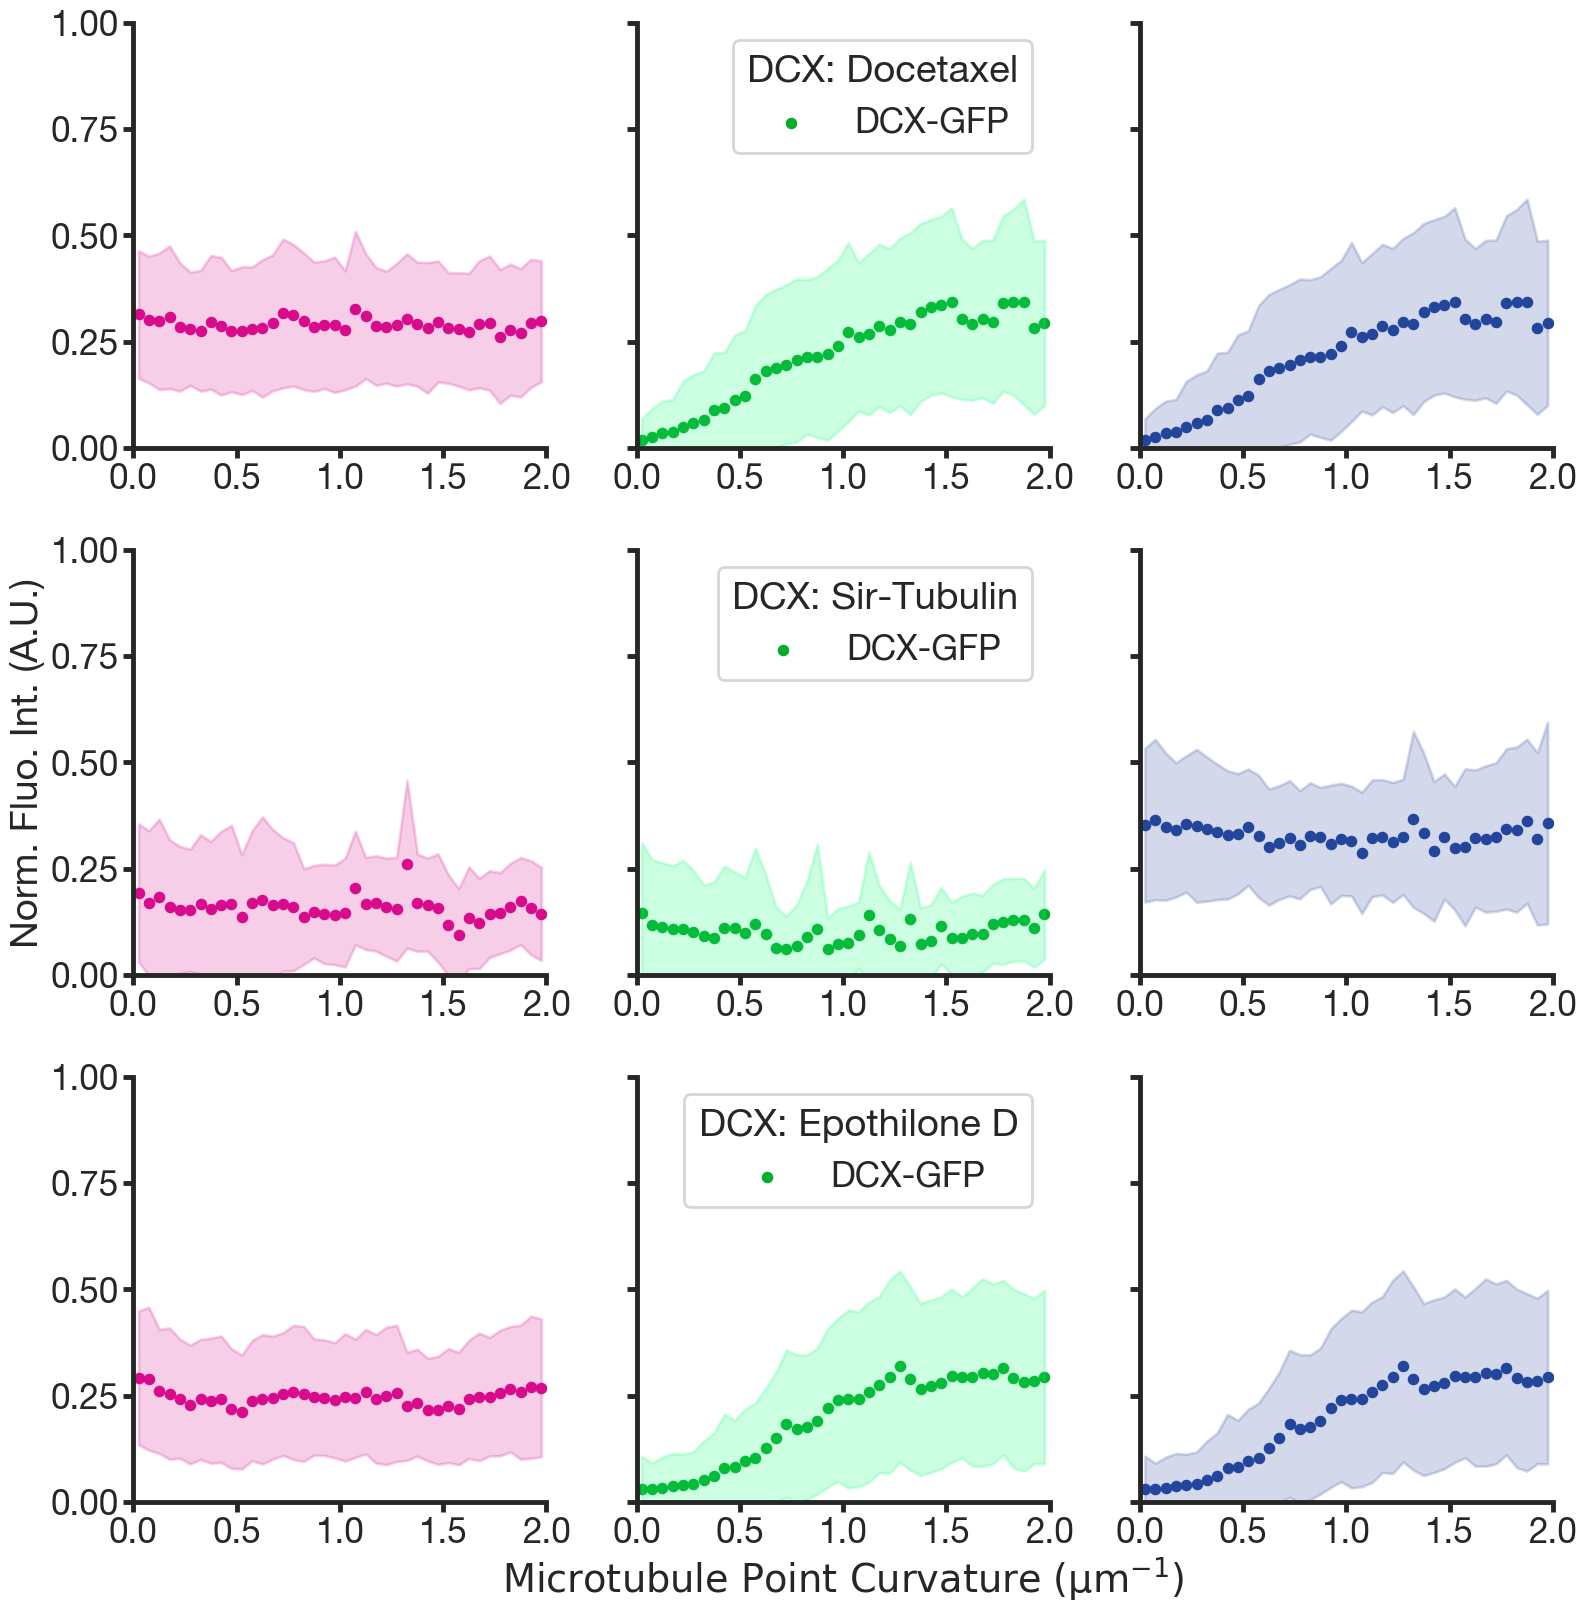

In [97]:

fig, ax = plt.subplots(3,3,figsize=(16.5,16.75), sharey=True)
gs = fig.add_gridspec(1, 3, hspace=0, wspace=0)
count = 0

for i in np.arange(len(ax)):
    
    dcxtype  = data['Drug Type'].unique()
    
    datadcxtype = data[data['Drug Type']== dcxtype[i]]
    datadcxtype = datadcxtype[['Point Curvature (um-1)','Red Intensity Normalized','Green Intensity Normalized','Blue Intensity Normalized']]
    binsize = 0.05
    limX= 2
    data_interval_mean = datadcxtype.groupby(pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))).mean()
    data_interval_std = datadcxtype.groupby(pd.cut(datadcxtype['Point Curvature (um-1)'], np.arange(0, limX+binsize, binsize))).std()
    data_interval_mean['Bin Center'] =np.arange(binsize, limX+binsize, binsize)-binsize/2
    data_interval_std['Bin Center'] =np.arange(binsize, limX+binsize, binsize)-binsize/2
    
    
    
    for j in np.arange(len(ax)):
    
            
        x = data_interval_mean['Bin Center'].values
        channel = channels[j]
        mean = data_interval_mean[channel+' Intensity Normalized'].values
        std = data_interval_std[channel+' Intensity Normalized'].values
        colorF = colors_fill[j]
        colorM = colors_marker[j]
        ax[i][j].scatter(x, mean, color=colorM,s=scattersize)
        ax[i][j].fill_between(x, mean - std, mean + std, color=colorF, alpha=0.2)
        ax[i][j].set_ylim(0,1)
        ax[i][j].set_xticks(np.arange(0, 2.1, 0.5))
        ax[i][j].set_yticks(np.arange(0, 1.1, 0.25))
        ax[i][j].set_xlim(0,2)
        
        ax[i][j].spines['left'].set_lw(3.5)
        ax[i][j].spines['bottom'].set_lw(3.5)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)

        #ax[i][j].legend(DataLabel[j],loc='upper right')
        ax[i][1].legend(DataLabel[j-1],loc='upper right',title='DCX: '+dcxtype[i])

        


ax[1][0].set_ylabel('Norm. Fluo. Int. (A.U.)')
ax[2][1].set_xlabel('Microtubule Point Curvature '  r'$(\mu m ^{-1})$')

#fig.supxlabel('Microtubule Point Curvature ' r'$(\mu m ^{-1})$')

sns.set_style("ticks")
sns.despine()

sns.set_context("poster", font_scale=1.15, rc={"lines.linewidth":3.0})

plt.tight_layout()
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
plt.savefig(path/('curvature_dcx_drugs'+date_today+'.pdf'))

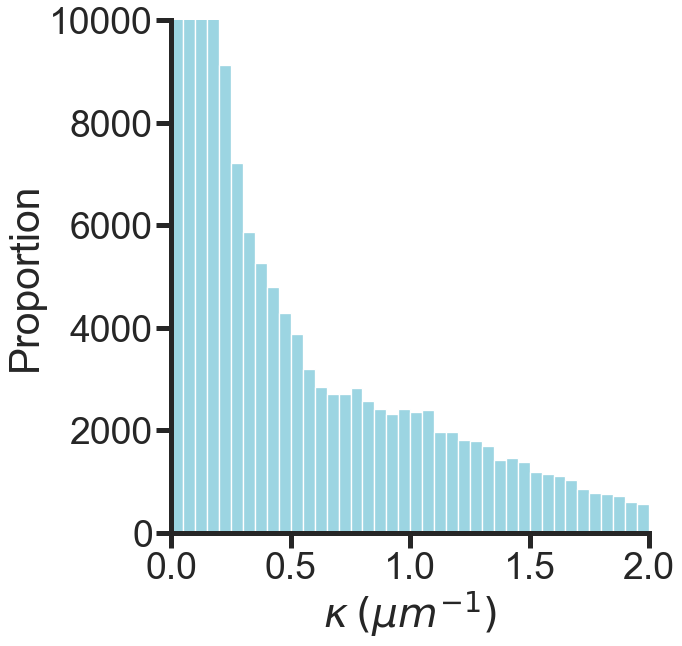

In [321]:
fig, ax = plt.subplots(1,1,figsize=(10.5,10))
sns.histplot(data, x='Point Curvature (um-1)',bins=np.arange(0, limX+binsize, binsize), color='#7BC8D9')#, stat='probability')
#n, bins, patches = plt.hist(x, 50, density = True, facecolor='#7BC8D9')

ax.set_ylabel('Proportion')
ax.set_xlabel( r'$\kappa \: (\mu m ^{-1})$')
ax.set_xlim(0,2)
ax.set_ylim(0,10000)
#plt.yticks([0,0.15,0.3])

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(path/('histogram_curves'+date_today+'.svg'))